<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

# Problems with Motion

We will continue to focus on problems with motion as motivation for our investigations.  Aristotelian visions of motion earlier discussed are not quantitative in our contemporary usage of the word.  Alternative work is evident in scholastic philosophers and mathematicians investigations of motion, particularly that of Nicole Oresme.  These kinds of problems in quantifying bodies in motion continued to be of central interest to many of the names we often hear associated with the sixteenth centuries work in European mathematics and science like Galileo, Descartes, Newton, and Leibniz.

**GOALS:**

- Understand relationship between *distance, velocity*, and *time*. 

- Plot displacement and velocity graphs, connect these with language of sums and differences

- Use rate of change and slope to describe the relationships between displacement and velocity



Let's begin by stating some of the quantities involved and how they are related.

- **D** = distance

- **V** = velocity

- **t** = time

- $D = Vt$

This should seem familiar and intuitive.  We start by imagining an object moving at a constant velocity of 10 mi/hr for 10 hours.  

We can examine the graph of the velocity defined sequentially and as a constant function.

For the sequence, we just continue to produce terms of 10, as shown below.



In [2]:
a = [10]
for i in range(10):
    next = 10
    a.append(next)

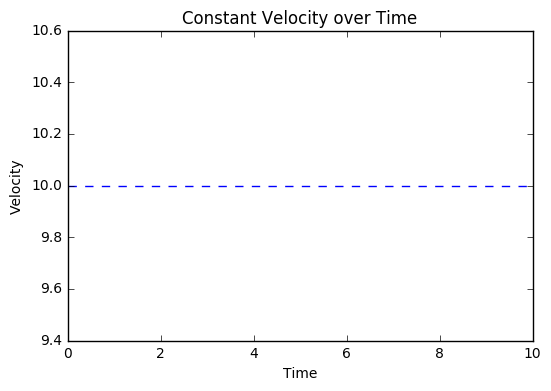

In [3]:
plt.plot(a, '--')
plt.title("Constant Velocity over Time")
plt.xlabel("Time")
plt.ylabel("Velocity")

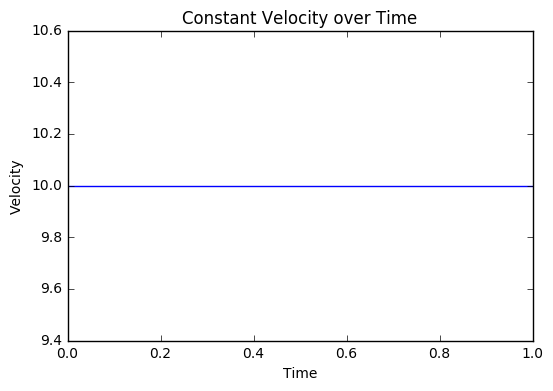

In [4]:
plt.axhline(10)
plt.title("Constant Velocity over Time")
plt.xlabel("Time")
plt.ylabel("Velocity")

We can also consider the graph of Distance versus Time on the same interval for the constant velocity of 10mi/hr.  Sequentially, this means that we add 10 miles every hour. 

In [5]:
d = [0]
for i in range(10):
    next = d[i]+10
    d.append(next)
    
d

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

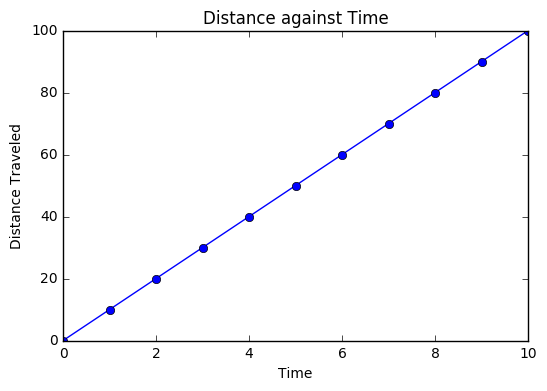

In [6]:
plt.plot(d, '-o')
plt.title("Distance against Time")
plt.xlabel("Time")
plt.ylabel("Distance Traveled")

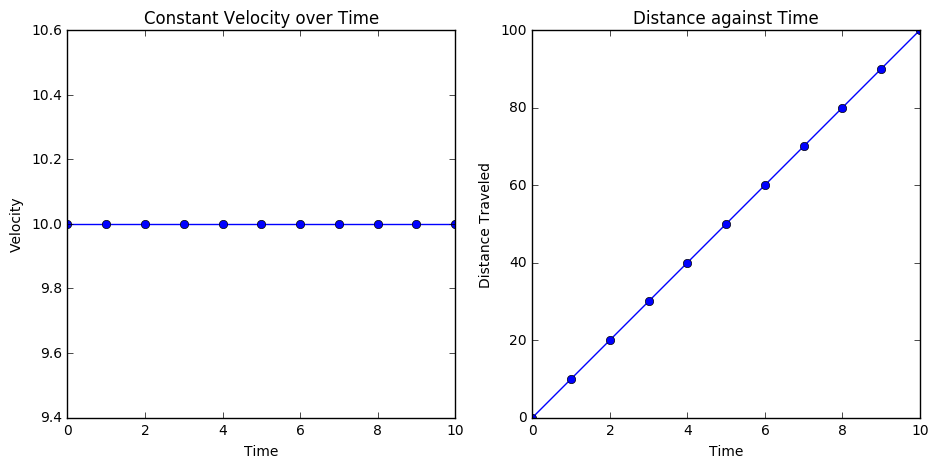

In [7]:
plt.figure(figsize = (11, 5))
plt.subplot(1, 2, 1)
plt.plot(a, '-o')
plt.title("Constant Velocity over Time")
plt.xlabel("Time")
plt.ylabel("Velocity")

plt.subplot(1, 2, 2)
plt.plot(d, '-o')
plt.title("Distance against Time")
plt.xlabel("Time")
plt.ylabel("Distance Traveled")

Perhaps you recognize the action of moving from the left graph to the right graph as a connection to the summation and definite integral problem.  This is an incredibly important connection to make.  

We have techniques for moving from the left to the right, or from velocity to distance through integration.  

How can we move from the right graph to the left, or from distance to velocity?

Recall our early work connecting arithmetic sequences to linear functions.  Again, we have the plot of Distance against Time formed by an arithmetic sequence.  This can be representing by the closed form definition as:

$$D(t) = 10t$$

Note the connection to the rate of change of the sequence and the coefficient of $t$.  This is the familiar **slope** of the linear function, found as:

$$\text{slope} = \frac{\text{change in distance}}{\text{change in time}} = \frac{vt}{t} = v$$

## Velocity, Distance, Slope, and Area

We seem to have a relationship that if we have a Velocity vs. Time graph, the area under this gives us the total distance traveled.  

Similarly, if we have a graph of the Distance vs. Time graph, the slope of this line is the velocity.  

This demonstrates a fundamentally important fact that we will continue to rehash.

### Forward and Backwards Motion

Suppose now that the car goes forward with constant velocity and returns with the same velocity.  We interpret the first part of this trip as positive velocity $+V$ and the return portion as negative velocity $-V$.  If we have a constant velocity of 5 mi/hr, and a 6 hour trip with no stopping, the cars velocity is as follows:

$$\text{for}~ 0 < t \leq 3; ~ V = 5$$
$$\text{for} ~3 \leq t \leq 6; ~ V = -5$$

We can define this function in two ways.  First, we can iteratively define the function with an `if` `then` statement.  If $t < 3$ then $V = 3$.  Otherwise, $V = -3$.  

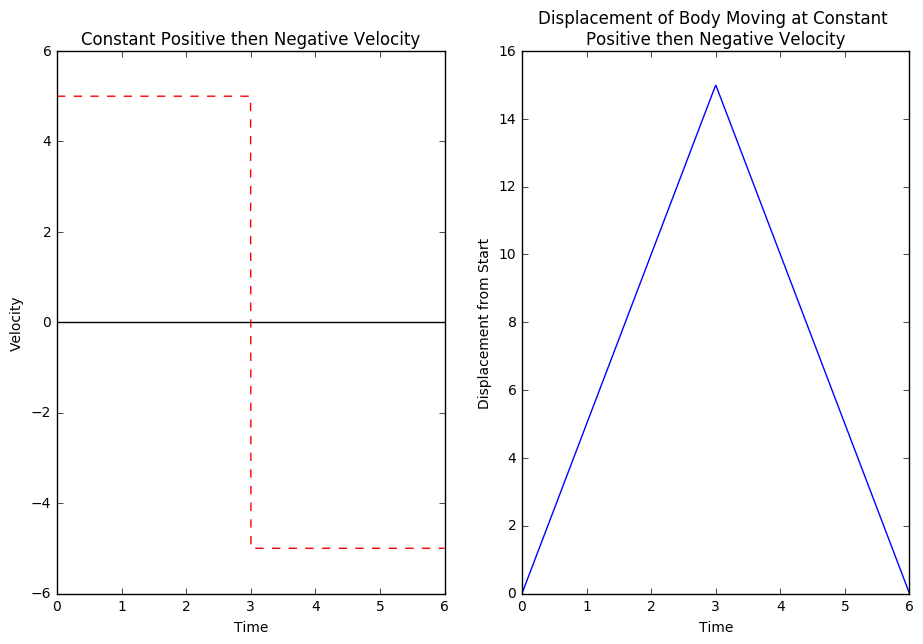

In [8]:
t = np.linspace(0, 6, 1000)

plt.figure(figsize = (11, 7))
plt.subplot(1, 2, 1)
y = []
for i in t:
        if i <= 3:
            y.append(5)
        else:
            y.append(-5)

plt.plot(t, y, '--k', color = 'red')
plt.axhline(color = 'black')
plt.title("Constant Positive then Negative Velocity")
plt.xlabel("Time")
plt.ylabel("Velocity")


plt.subplot(1, 2, 2)
t = np.linspace(0, 6, 1000)
y = []
for i in t:
        if i <= 3:
            y.append(5*i)
        else:
            y.append(-5*i + 30)

plt.plot(t, y)
plt.title("Displacement of Body Moving at Constant \nPositive then Negative Velocity")
plt.xlabel("Time")
plt.ylabel("Displacement from Start")

## Changing Velocity

The next situation to explore is if the velocity is changing.  For a simple example, let's imagine the velocity increases by 1 mi/hr per hour over a four hour trip.  Then, we would have the following velocities per time:


| Time | Velocity |
| ---  | ---   | 
| 0 | 0 |
| 1 | 1 | 
| 2 | 2 |
| 3 | 3 |
| 4 | 4 |

We could have the following graph of the situation.

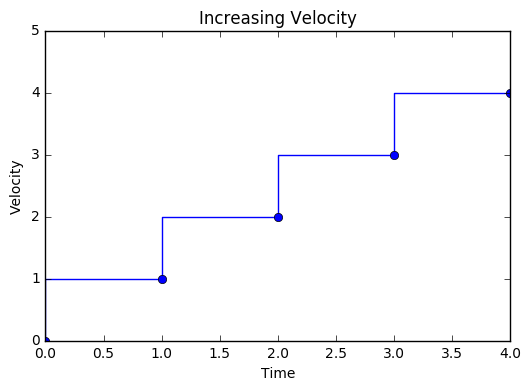

In [9]:
t = np.arange(0, 5, 1)
v = t
plt.step(t, v, '--o')
plt.ylim(0, 5)
plt.xlim(0, 4)
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Increasing Velocity")

Also, if we consider making the graph of the displacement based on the area under the graph, we have the following:

$$\text{Area} = 1 \times 1 + 1 \times 2 + 1 \times 3 + 1 \times 4$$

Now we can plot the area function based on the partial sums of the time intervals.

| Time | Displacement |
| --- | --- |
| 0 | 0 |
| 1 | 1 |
| 2 | 3 |
| 3 | 6 |
| 4 | 10 |

In [10]:
d = [0, 1, 3, 6, 10]

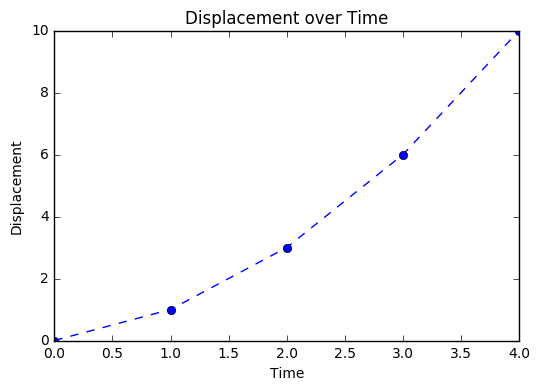

In [11]:
plt.plot(t, d, '--o')
plt.title("Displacement over Time")
plt.xlabel("Time")
plt.ylabel("Displacement")

# Problems

1. Suppose we have the following data on the displacements of objects.  Create a plot of the accompanying velocity graph for each.

In [12]:
d1 = [0, 60, 60, 0]

In [13]:
d2 = [10, 0, 20]

In [14]:
d3 = [0, 20, 30, 0]

In [15]:
d4 = [0, 0, 1, 1]

2. Now suppose we have the following information about the velocity of each body as follows.  Construct a plot of the displacement.

(-5, 35)

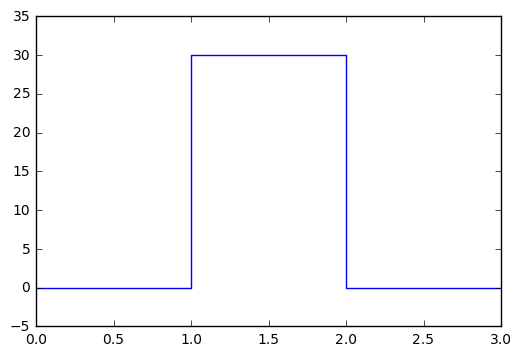

In [16]:
v1 = [0, 30, 0, 0]
plt.step(np.arange(len(v1)), v1, where = 'post')
plt.ylim(min(v1)-5,  max(v1)+5)

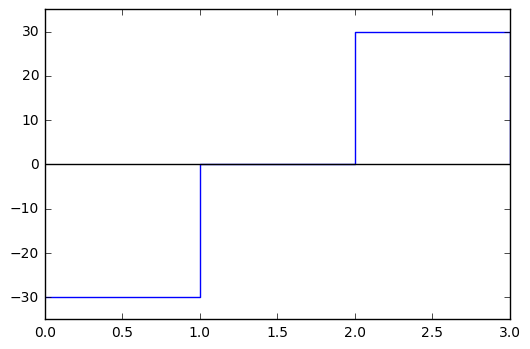

In [17]:
v2 = [-30, 0, 30, 0]
plt.step(np.arange(len(v2)), v2, where = 'post')
plt.ylim(min(v2)-5,  max(v2)+5)
plt.axhline(color = 'black')

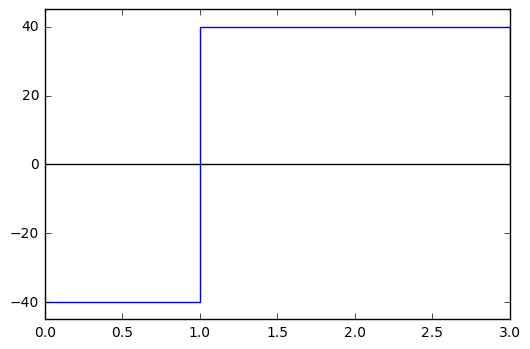

In [18]:
v3 = [-40, 40, 40, 0]
plt.step(np.arange(len(v3)), v3, where = 'post')
plt.ylim(min(v3)-5,  max(v3)+5)
plt.axhline(color = 'black')

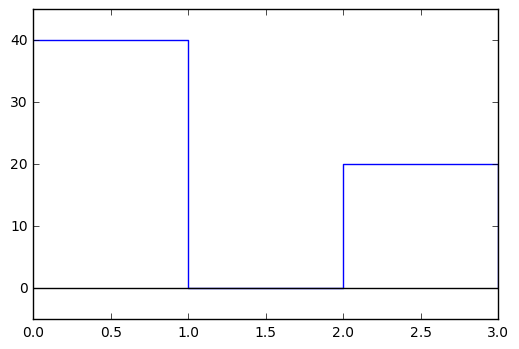

In [19]:
v4 = [40, 0, 20, 0]
plt.step(np.arange(len(v4)), v4, where = 'post')
plt.ylim(min(v4)-5,  max(v4)+5)
plt.axhline(color = 'black')

## Defining a Piecewise Function

We have to add a step to allow us to work with a piecewise function in our familiar manner with the `np.vectorize` command.  Only then can we substitute an array of values created from the `np.linspace` command.  Below is a simple example of a piecewise function defined using the familiar function syntax with a conditional statement.  

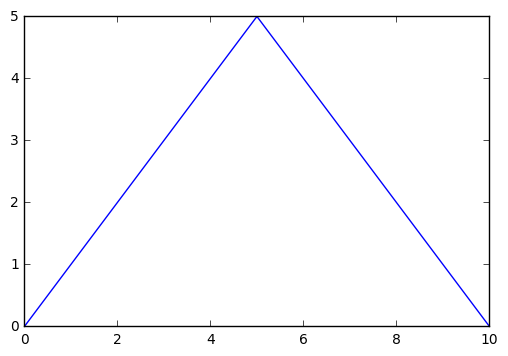

In [20]:
def f(x):
    if x <= 5:
        return x
    else:
        return 10-x
    
x = np.linspace(0,10,1000)

f2 = np.vectorize(f)
y = f2(x)
plt.figure()
plt.plot(x, y)
plt.show()